# Titanic Exam

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.


In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sb

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)
print(full_data.shape)
# Print the first few entries of the RMS Titanic data
display(full_data.head())
full_data=full_data.fillna(np.mean(full_data))

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [5]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())
print(type(outcomes))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.series.Series'>


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [6]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    

predictions = pd.Series(np.ones(5, dtype = int))
output=accuracy_score(outcomes[:5], predictions)
print(output)

Predictions have an accuracy of 60.00%.


> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [7]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for i in range(data.shape[0]):
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [8]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


**Answer: put your answer here**  

***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using matplot or seaborn

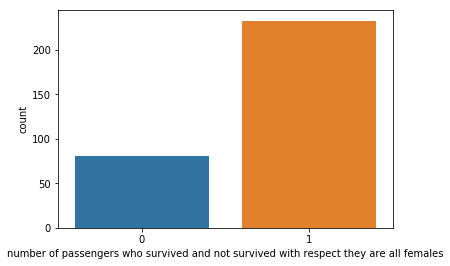

In [9]:
#to do:  find a relationship between feature "sex" and  survival rate
female_data=full_data[full_data["Sex"] == "female"]
sb.countplot(data=female_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived with respect they are all females");

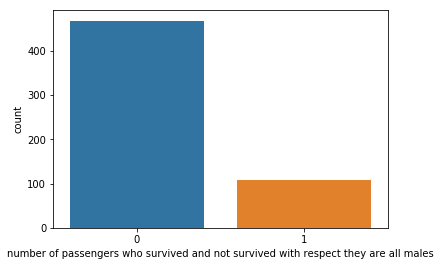

In [10]:
male_data=full_data[full_data["Sex"] == "male"]
sb.countplot(data=male_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived with respect they are all males");

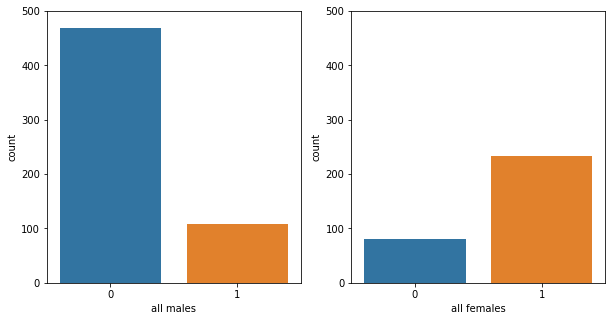

In [13]:
plt.figure(figsize = [10, 5])
# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot(data=male_data,x='Survived')
ylabel=np.arange(0,600,100)
plt.yticks(ylabel);
plt.xlabel("all males");
plt.subplot(1, 2, 2)
sb.countplot(data=female_data,x='Survived');
ylabel=np.arange(0,600,100)
plt.yticks(ylabel);
plt.xlabel("all females");

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [18]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for i,passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        pass
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
'''
for i,passenger in data.head(1).iterrows():
    print(i)
    print(passenger)
passenger["Sex"]
'''


0
PassengerId                          1
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


'male'

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [70]:
print(accuracy_score(outcomes, predictions))

Number of predictions does not match number of outcomes!


**Answer: put your answer here**

***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the **matplot and seaborn**. This time only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

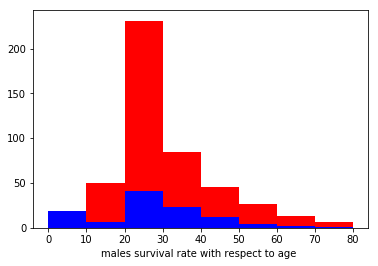

In [71]:

male_data_nsurv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 0)] # red
male_data_surv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 1)]  # blue
bins=np.arange(0,full_data['Age'].max()+10,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue")
plt.xlabel("males survival rate with respect to age ");

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [ ]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for i,passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        
        pass
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)


### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived? 

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [ ]:
print(accuracy_score(outcomes, predictions))

**Answer: put your asnwer here**

***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.


In [ ]:
# todo: graph  the histogram  for the age of males (survivied in blue and not survivied in red) with respect age < 18


In [ ]:
#todo : graph a chart for survival and not survival  with respect they are females and no of Parch ==3
#todo : graph a chart for survival and not survival  with respect they are females and no of Parch ==4
#todo : graph a chart for survival and not survival  with respect they are females and no of Parch ==5
#todo : graph a chart for survival and not survival  with respect they are females and no of Parch ==6
# write notes for all graphs with respect who survived the most according to no of Parch

In [ ]:
#todo : graph a chart for survival and not survival  with respect they are males and Pclass ==1
#todo : graph a chart for survival and not survival  with respect they are males and Pclass ==2
#todo : graph a chart for survival and not survival  with respect they are males and Pclass ==3
# write notes for all graphs with respect who survived the most according to Pclass

In [ ]:
# todo: graph  the histogram  for the age of males (survivied in blue and not survivied in red) with respect  Pclass=1
# write notes for this graph with respect who survived the most according to age


After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

In [ ]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for i, passenger in data.iterrows():
        
        pass
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4

* Describe the steps you took to implement the final prediction model so that it got **an accuracy of at least 80%**. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?

**Hint:** Run the code cell below to see the accuracy of your predictions.

In [ ]:
print(accuracy_score(outcomes, predictions))

**Answer: put your answer here** 